In [59]:
# To supress unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

# Imports

In [99]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Reading & Understanding Data

In [100]:
original_data = pd.read_csv('day.csv')
original_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [101]:
original_data.shape

(730, 16)

In [102]:
original_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [103]:
original_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Findings

1. Data has 730 rows & 16 columns
2. Out of 16 columns

    a. '11' are integer type
    
    b. '4' are float type
    
    c. '1' is object type i.e. 'dteday'  
    
3. 'cnt' is our target variable
4. Columns not useful for analysis

    a. 'instant': Just a number
    
    b. 'dteday' : Since, we already have month & year. Therefore, it won't make any sense in our analysis
    
    c. 'casual' : Part of our target variable
    
    d. 'registered' : Part of our target variable    
    
5. These remaining 12 columns can be broadly divided into two major categories

    a. Numeric Variables: 'temp', 'atemp','hum','windspeed', 'cnt'
    
    b. Categorical Variables: 'season','year','mnth','holiday','weekday','workingday','weathersit'

# Data Cleaning & Manipulation

In [104]:
# Creating a copy of the original data so that we can always retrive original data if something goes wrong
import copy
data = copy.deepcopy(original_data)

## Fixing rows & columns

### Checking null Values

In [105]:
# Column-wise
col_null_percentages = data.apply(lambda row: row.isnull().sum() / len(row) * 100)
print(col_null_percentages.sort_values(ascending = False))

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64


In [106]:
# Row-wise
row_null_percentages = data.apply(lambda row: row.isnull().sum() / len(row) * 100, axis=1)
print(row_null_percentages.sort_values(ascending = False))

0      0.0
479    0.0
481    0.0
482    0.0
483    0.0
      ... 
245    0.0
246    0.0
247    0.0
248    0.0
729    0.0
Length: 730, dtype: float64


### Dropping irrelevant columns

In [107]:
cols_to_be_dropped = ['instant', 'dteday','casual', 'registered']
data.drop(cols_to_be_dropped, axis=1, inplace=True)
print(data.head())
print(data.shape)

   season  yr  mnth  holiday  weekday  workingday  weathersit       temp  \
0       1   0     1        0        6           0           2  14.110847   
1       1   0     1        0        0           0           2  14.902598   
2       1   0     1        0        1           1           1   8.050924   
3       1   0     1        0        2           1           1   8.200000   
4       1   0     1        0        3           1           1   9.305237   

      atemp      hum  windspeed   cnt  
0  18.18125  80.5833  10.749882   985  
1  17.68695  69.6087  16.652113   801  
2   9.47025  43.7273  16.636703  1349  
3  10.60610  59.0435  10.739832  1562  
4  11.46350  43.6957  12.522300  1600  
(730, 12)


## Checking duplicates

In [108]:
no_of_duplicates = data.duplicated().sum()
print(no_of_duplicates)

0


## Checking for Unknow values

In [109]:
for col in data.columns:
    print(f'value count of {col}')
    print(data[col].value_counts(),'\n')

value count of season
3    188
2    184
1    180
4    178
Name: season, dtype: int64 

value count of yr
0    365
1    365
Name: yr, dtype: int64 

value count of mnth
1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: mnth, dtype: int64 

value count of holiday
0    709
1     21
Name: holiday, dtype: int64 

value count of weekday
6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: weekday, dtype: int64 

value count of workingday
1    499
0    231
Name: workingday, dtype: int64 

value count of weathersit
1    463
2    246
3     21
Name: weathersit, dtype: int64 

value count of temp
26.035000    5
10.899153    5
27.880000    4
28.563347    4
23.130847    4
            ..
27.435847    1
26.376653    1
28.989419    1
28.700000    1
8.849153     1
Name: temp, Length: 498, dtype: int64 

value count of atemp
32.73440    4
18.78105    3
31.85040    3
28.59875    2
23.32625    2
           ..
28.94730    1
30.

## Checking Outliers

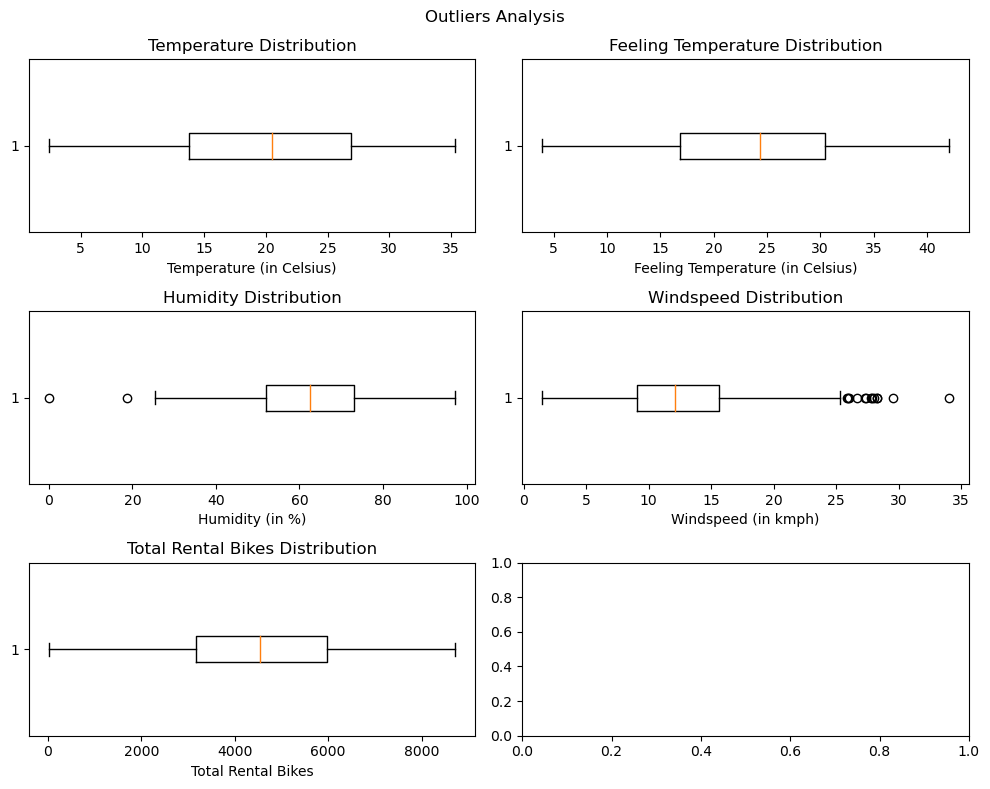

In [110]:
# These variables to be checked: 'temp', 'atemp','hum','windspeed' & 'cnt'

# create a figure with 6 subplots
fig_1, axs_1 = plt.subplots(nrows=3, ncols=2, figsize=(10,8))

# plot data in each subplot
axs_1[0, 0].boxplot(data['temp'], vert=False)
axs_1[0, 0].set_title('Temperature Distribution')
axs_1[0, 0].set_xlabel('Temperature (in Celsius)')

axs_1[0, 1].boxplot(data['atemp'], vert=False)
axs_1[0, 1].set_title('Feeling Temperature Distribution')
axs_1[0, 1].set_xlabel('Feeling Temperature (in Celsius)')

axs_1[1, 0].boxplot(data['hum'], vert=False)
axs_1[1, 0].set_title('Humidity Distribution')
axs_1[1, 0].set_xlabel('Humidity (in %)')

axs_1[1, 1].boxplot(data['windspeed'], vert=False)
axs_1[1, 1].set_title('Windspeed Distribution')
axs_1[1, 1].set_xlabel('Windspeed (in kmph)')

axs_1[2, 0].boxplot(data['cnt'], vert=False)
axs_1[2, 0].set_title('Total Rental Bikes Distribution')
axs_1[2, 0].set_xlabel('Total Rental Bikes')

# set figure title
fig_1.suptitle('Outliers Analysis')

# adjust subplot spacing
plt.tight_layout()

plt.show()

## Findings

1. There are no null values in the data
2. Dropping 4 irrelevant columns: 'instant', 'dteday','casual' & 'registered'
3. There are no duplicates in the data
4. There are no unknown values in the data
5. Majority of the columns have no outliers. The outliers in the 'hum' & 'windspeed' seems acceptable. So, let's keep them.

# EDA

## Numeric Variables

<Figure size 1200x800 with 0 Axes>

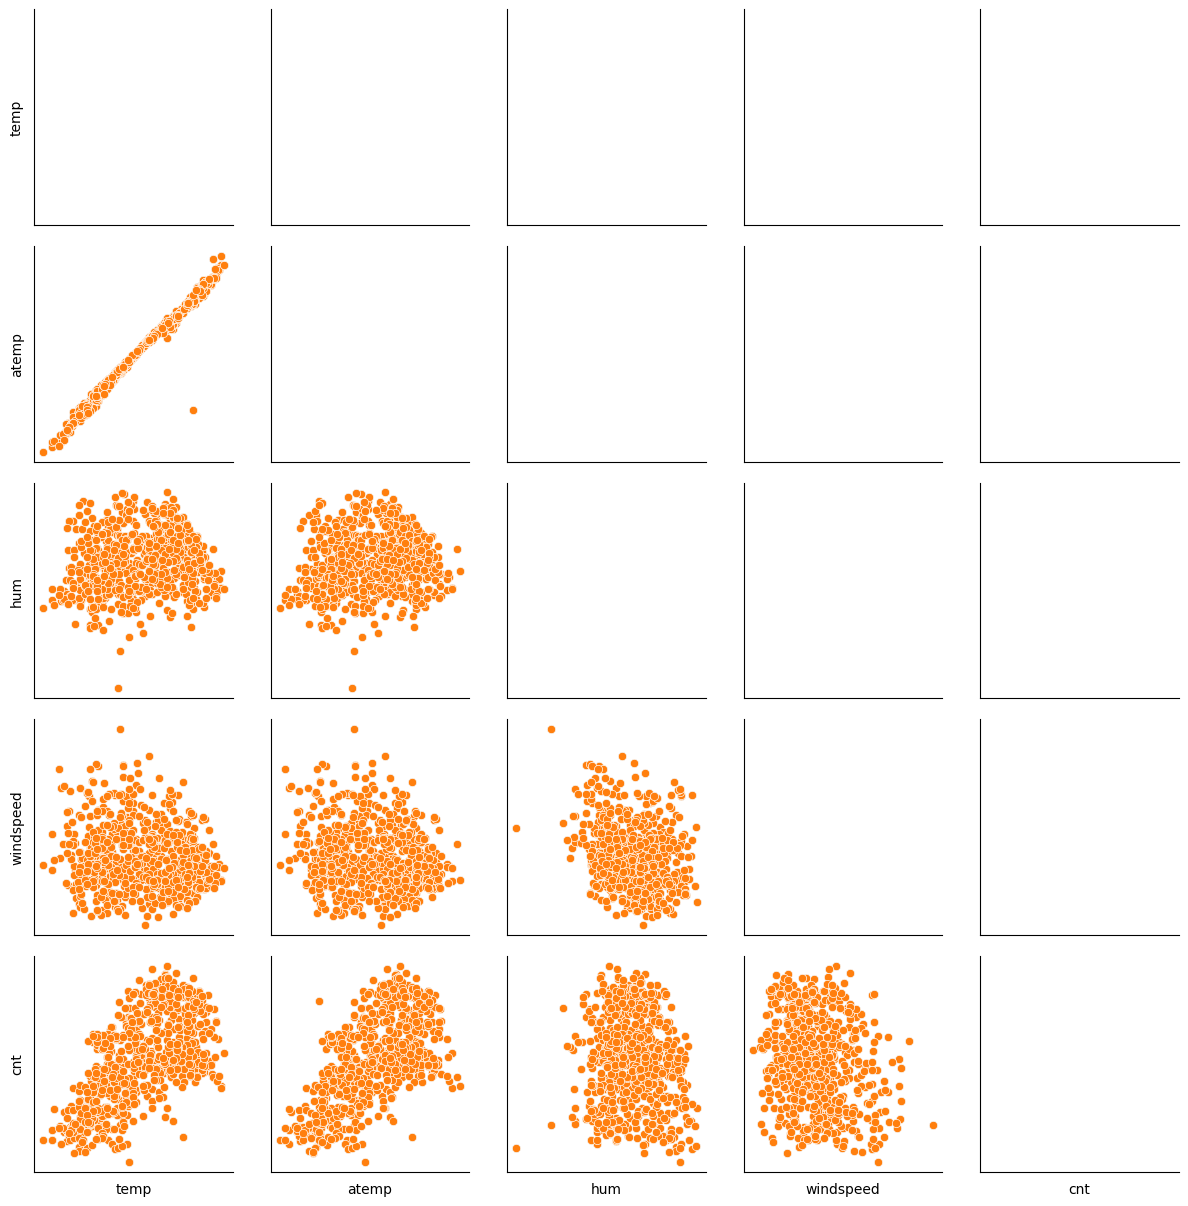

In [111]:
# Heatmap to understand colinearity b/w variables
plt.figure(figsize=(12,8))

numeric_variables = ['temp', 'atemp','hum','windspeed', 'cnt']
numeric_variables_df = original_data[numeric_variables]

# create a pair plot
pair_plot = sns.PairGrid(numeric_variables_df)
pair_plot.map_lower(sns.scatterplot)

# show only the upper triangle
pair_plot = pair_plot.map_lower(sns.scatterplot).set(xticks=[], yticks=[])

sns.despine()
plt.show()

### Findings

1. 'temp' & 'atemp' shows a very strong linear relationship which means they are high correlated. Therefore, we need to drop one of these.
2. 'temp' & 'cnt' shows a good linear relationship which means it's going to be an important parameter.
3. Rest of the variables also shows a linear relationship with the 'cnt' variable.

## Categorical Variables

In [112]:
# Changing data values for better understanding

# Season
season_dict = {
    1: 'Spring',
    2: 'Summer',
    3: 'Fall',
    4: 'Winter',
}

# Mapping to get the real value
data['season'] = data['season'].map(season_dict)

# month

month_dict = {
    1: 'Jan',
    2: 'Feb',
    3: 'Mar',
    4: 'Apr',
    5: 'May',
    6: 'Jun',
    7: 'Jul',
    8: 'Aug',
    9: 'Sep',
    10: 'Oct',
    11: 'Nov',
    12: 'Dec',
}

# Mapping to get the real value
data['mnth'] = data['mnth'].map(month_dict)

# weekday
weekday_dict = {
    0: 'Sun',
    1: 'Mon',
    2: 'Tue',
    3: 'Wed',
    4: 'Thu',
    5: 'Fri',
    6: 'Sat',
}

# Mapping to get the real value
data['weekday'] = data['weekday'].map(weekday_dict)

# weathersit
weathersit_dict = {
    1: 'Clear',
    2: 'Mist',
    3: 'Light_Snow',
    4: 'Heavy_Rain',
}
# Mapping to get the real value
data['weathersit'] = data['weathersit'].map(weathersit_dict)

In [113]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Sat,0,Mist,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Sun,0,Mist,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


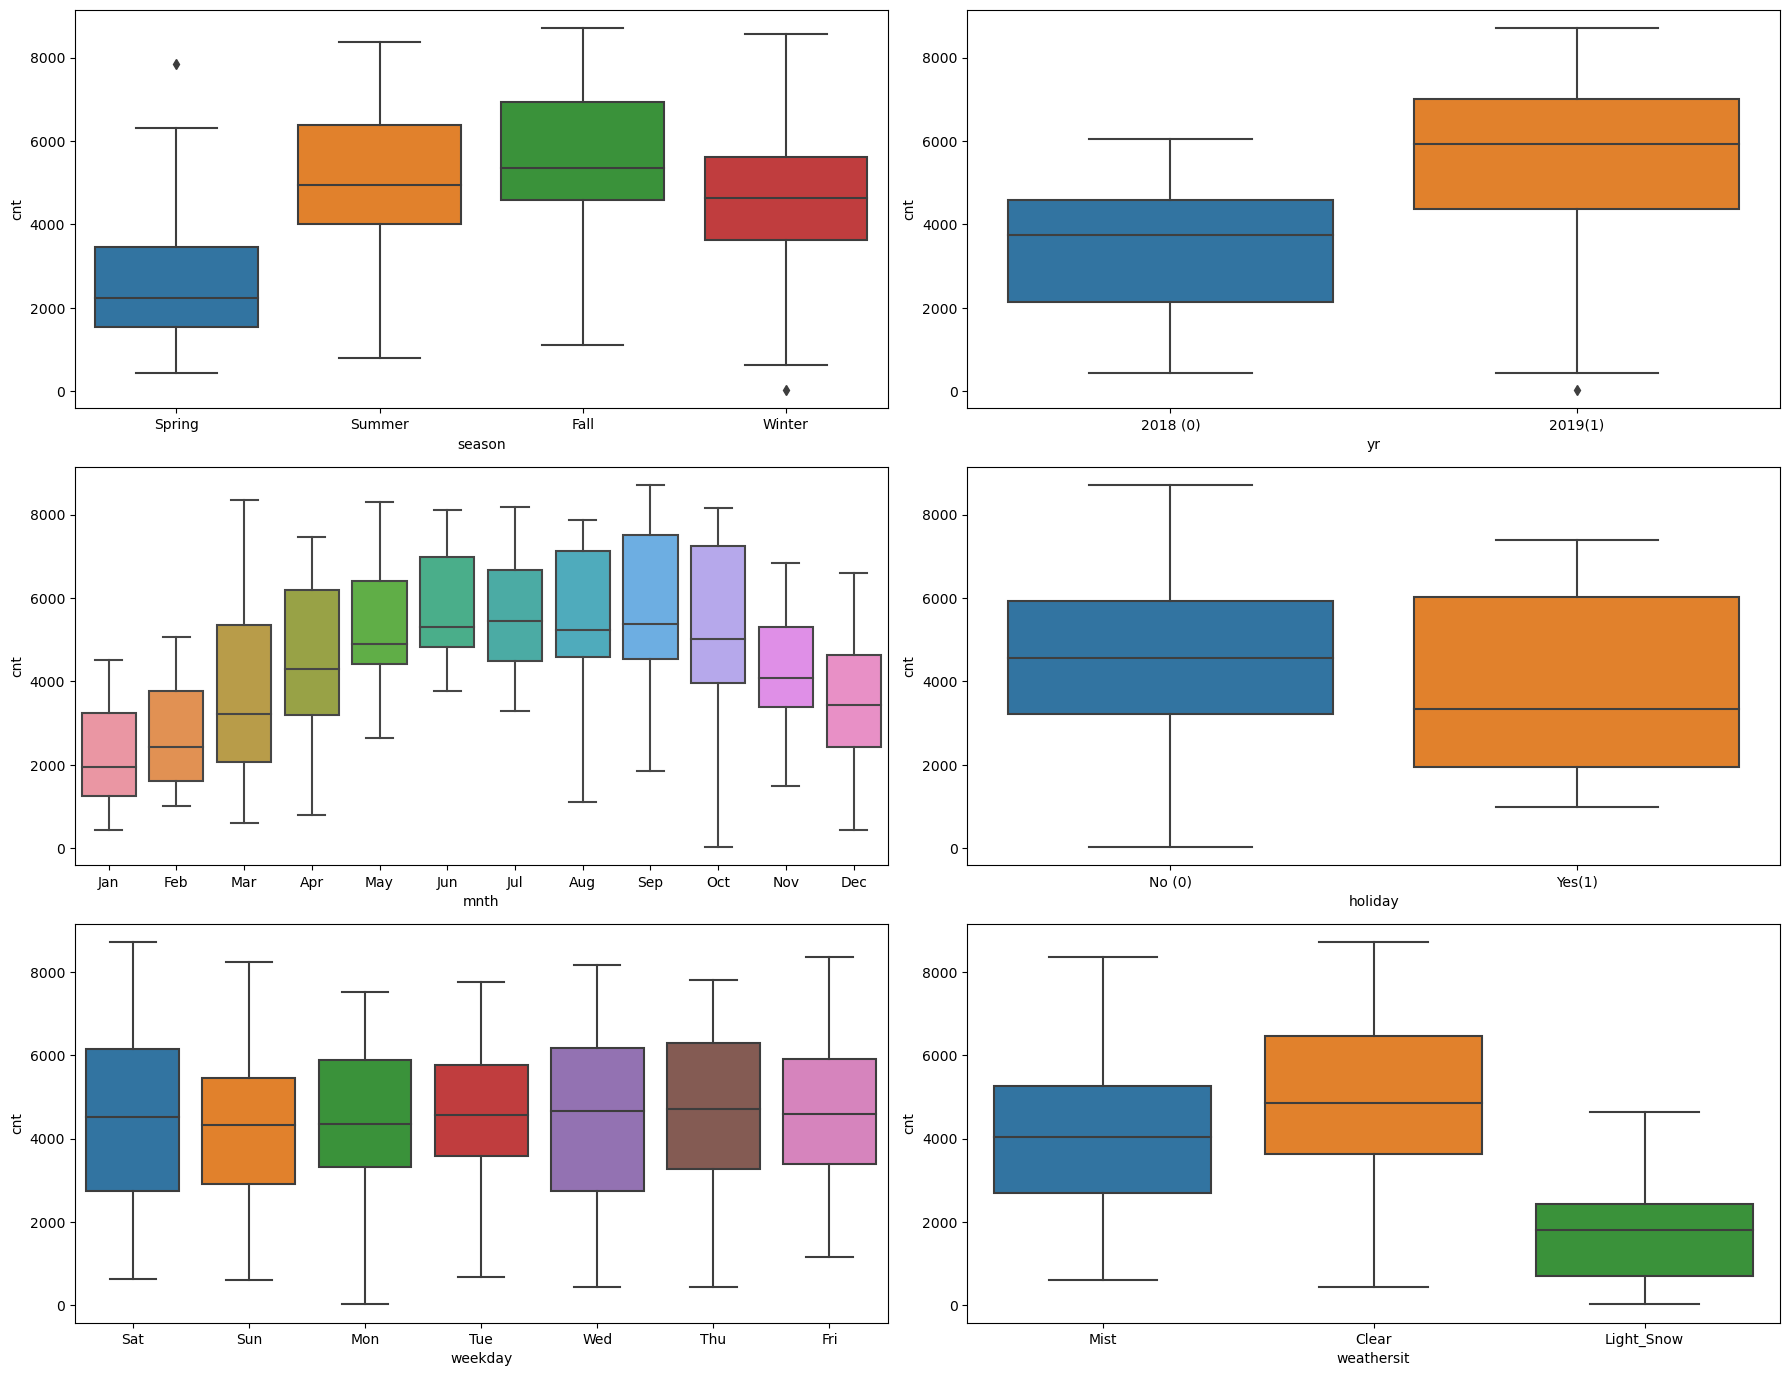

In [114]:
plt.figure(figsize=(18, 18))

plt.subplot(4,2,1)
sns.boxplot(data= data, x = 'season', y = 'cnt')

plt.subplot(4,2,2)
sns.boxplot(data= data, x = 'yr', y = 'cnt')
plt.xticks([0,1],['2018 (0)','2019(1)'])

plt.subplot(4,2,3)
sns.boxplot(data= data, x = 'mnth', y = 'cnt')

plt.subplot(4,2,4)
sns.boxplot(data= data, x = 'holiday', y = 'cnt')
plt.xticks([0,1],['No (0)','Yes(1)'])

plt.subplot(4,2,5)
sns.boxplot(data= data, x = 'weekday', y = 'cnt')

plt.subplot(4,2,6)
sns.boxplot(data= data, x = 'weathersit', y = 'cnt')

# adjust subplot spacing
plt.tight_layout()

plt.show()

### Findings

1. During summer & fall, bookings are much more as compare to spring & winter
2. No. of bookings increases in 2019 as compare to 2018
3. There is upward trend in booking from Jan to May, then, stays more of same till Oct and, then, again starts falling till Dec
4. No. of bookings on a 'non-holiday' day is more as compare to holidays
5. Bookings remains almost same through-out the week. No exceptional decrease or increase.
6. No. of bookings are highest on a clear day & lowest on light snow. There are no bookings when it rains heavily.

# Data Preparation

## Creating dummy data

Need to create dummy variables for 'season', 'weathersit', 'weekday' & 'mnth'

### season

In [115]:
data['season'].value_counts()

Fall      188
Summer    184
Spring    180
Winter    178
Name: season, dtype: int64

In [116]:
# Creating n-1 dummy variables
season_dummy_df = pd.get_dummies(data['season'] , drop_first = True)

# Concatenating dummy dataframe with the original data
data = pd.concat([data, season_dummy_df], axis=1)

# Dropping 'season' column
data.drop(['season'], axis=1, inplace=True)

data.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,Spring,Summer,Winter
0,0,Jan,0,Sat,0,Mist,14.110847,18.18125,80.5833,10.749882,985,1,0,0
1,0,Jan,0,Sun,0,Mist,14.902598,17.68695,69.6087,16.652113,801,1,0,0
2,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,1,0,0
3,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,1,0,0
4,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,1,0,0


### weathersit

In [117]:
data['weathersit'].value_counts()

Clear         463
Mist          246
Light_Snow     21
Name: weathersit, dtype: int64

This indicates that type '4' weathersit never occured in the data

In [ ]:
'''
To Understand the values in 'weathersit' column, please refer this:

weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
'''

In [118]:
# Creating n-1 dummy variables
weathersit_dummy_df = pd.get_dummies(data['weathersit'], drop_first = True)

# Concatenating dummy dataframe with the original data
data = pd.concat([data, weathersit_dummy_df], axis=1)

# Dropping 'season' column
data.drop(['weathersit'], axis=1, inplace=True)

data.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,Winter,Light_Snow,Mist
0,0,Jan,0,Sat,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,1
1,0,Jan,0,Sun,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,1
2,0,Jan,0,Mon,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0
3,0,Jan,0,Tue,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0
4,0,Jan,0,Wed,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0


### weekday

In [119]:
data['weekday'].value_counts()

Sat    105
Sun    105
Mon    105
Tue    104
Thu    104
Fri    104
Wed    103
Name: weekday, dtype: int64

In [120]:
# Creating n-1 dummy variables
weeday_dummy_df = pd.get_dummies(data['weekday'] , drop_first = True)

# Concatenating dummy dataframe with the original data
data = pd.concat([data, weeday_dummy_df], axis=1)

# Dropping 'season' column
data.drop(['weekday'], axis=1, inplace=True)

data.head()

,yr,mnth,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,Winter,Light_Snow,Mist,Mon,Sat,Sun,Thu,Tue,Wed
0,0,Jan,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,1,0,1,0,0,0,0
1,0,Jan,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,1,0,0,1,0,0,0
2,0,Jan,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,1,0,0,0,0,0
3,0,Jan,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,0,0,0,1,0
4,0,Jan,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,0,0,0,0,1


### mnth

In [121]:
data['mnth'].value_counts()

Jan    62
Mar    62
May    62
Jul    62
Aug    62
Oct    62
Dec    62
Apr    60
Jun    60
Sep    60
Nov    60
Feb    56
Name: mnth, dtype: int64

In [122]:
# Creating n-1 dummy variables
mnth_dummy_df = pd.get_dummies(data['mnth'] , drop_first = True)

# Concatenating dummy dataframe with the original data
data = pd.concat([data, mnth_dummy_df], axis=1)

# Dropping 'season' column
data.drop(['mnth'], axis=1, inplace=True)

data.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,1,0,0,0,0,0,0,0


In [123]:
data.shape

(730, 30)

# Data Splitting

In [124]:
from sklearn.model_selection import train_test_split

# This initializes the random number generator with a fixed seed value which determines the starting point of the sequence of random numbers
np.random.seed(0)
df_train, df_test = train_test_split(data, train_size=0.7, random_state=10)

In [125]:
# Training Data
print(df_train.head())
print(df_train.shape)

     yr  holiday  workingday       temp     atemp      hum  windspeed   cnt  \
72    0        0           1  13.333897  16.60000  49.6957   9.174042  2046   
510   1        0           0  28.392500  32.13480  73.2500  13.332464  6536   
700   1        0           0  14.247500  17.96040  82.3333   8.333393  4649   
264   0        0           1  25.761653  27.74815  90.2083   8.584375  4795   
577   1        0           1  29.417500  33.36540  67.7500   9.458993  7580   

     Spring  Summer  ...  Dec  Feb  Jan  Jul  Jun  Mar  May  Nov  Oct  Sep  
72        1       0  ...    0    0    0    0    0    1    0    0    0    0  
510       0       1  ...    0    0    0    0    0    0    1    0    0    0  
700       0       0  ...    1    0    0    0    0    0    0    0    0    0  
264       0       0  ...    0    0    0    0    0    0    0    0    0    1  
577       0       0  ...    0    0    0    0    0    0    0    0    0    0  

[5 rows x 30 columns]
(510, 30)


In [126]:
# Test Data
print(df_test.head())
print(df_test.shape)

     yr  holiday  workingday       temp     atemp      hum  windspeed   cnt  \
566   1        0           0  24.429153  27.49560  86.5417  14.291100  4459   
374   1        0           1  12.656536  15.94130  64.6522  12.565984  3598   
181   0        0           1  29.622500  32.60810  39.6250   6.874736  5362   
529   1        0           1  26.581653  31.21915  56.9583  17.000111  7363   
233   0        0           1  28.358347  31.91270  47.0000  18.542250  4758   

     Spring  Summer  ...  Dec  Feb  Jan  Jul  Jun  Mar  May  Nov  Oct  Sep  
566       0       0  ...    0    0    0    1    0    0    0    0    0    0  
374       1       0  ...    0    0    1    0    0    0    0    0    0    0  
181       0       0  ...    0    0    0    1    0    0    0    0    0    0  
529       0       1  ...    0    0    0    0    1    0    0    0    0    0  
233       0       0  ...    0    0    0    0    0    0    0    0    0    0  

[5 rows x 30 columns]
(220, 30)


# Feature Scaling

In [127]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
72,0,0,1,13.333897,16.60000,49.6957,9.174042,2046,1,0,...,0,0,0,0,0,1,0,0,0,0
510,1,0,0,28.392500,32.13480,73.2500,13.332464,6536,0,1,...,0,0,0,0,0,0,1,0,0,0
700,1,0,0,14.247500,17.96040,82.3333,8.333393,4649,0,0,...,1,0,0,0,0,0,0,0,0,0
264,0,0,1,25.761653,27.74815,90.2083,8.584375,4795,0,0,...,0,0,0,0,0,0,0,0,0,1
577,1,0,1,29.417500,33.36540,67.7500,9.458993,7580,0,0,...,0,0,0,0,0,0,0,0,0,0


In [128]:
from sklearn.preprocessing import MinMaxScaler

# Initializing MinMaxScaler object
scaler = MinMaxScaler()

# Creating a list of columns to be scaled
features_to_scale = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

# Performing feature scaling
df_train[features_to_scale] = scaler.fit_transform(df_train[features_to_scale])

df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
72,0,0,1,0.298094,0.311594,0.393891,0.236118,0.194978,1,0,...,0,0,0,0,0,1,0,0,0,0
510,1,0,0,0.778657,0.731886,0.694105,0.364071,0.737052,0,1,...,0,0,0,0,0,0,1,0,0,0
700,1,0,0,0.327249,0.348399,0.809877,0.210252,0.509236,0,0,...,1,0,0,0,0,0,0,0,0,0
264,0,0,1,0.694699,0.613206,0.910249,0.217975,0.526862,0,0,...,0,0,0,0,0,0,0,0,0,1
577,1,0,1,0.811368,0.765180,0.624004,0.244886,0.863093,0,0,...,0,0,0,0,0,0,0,0,0,0


# Creating X & Y

Creating input & output data for model building

In [129]:
x_train = df_train.drop('cnt', axis=1)
y_train = df_train['cnt']

In [130]:
print(x_train.head())
print(x_train.shape)

     yr  holiday  workingday      temp     atemp       hum  windspeed  Spring  \
72    0        0           1  0.298094  0.311594  0.393891   0.236118       1   
510   1        0           0  0.778657  0.731886  0.694105   0.364071       0   
700   1        0           0  0.327249  0.348399  0.809877   0.210252       0   
264   0        0           1  0.694699  0.613206  0.910249   0.217975       0   
577   1        0           1  0.811368  0.765180  0.624004   0.244886       0   

     Summer  Winter  ...  Dec  Feb  Jan  Jul  Jun  Mar  May  Nov  Oct  Sep  
72        0       0  ...    0    0    0    0    0    1    0    0    0    0  
510       1       0  ...    0    0    0    0    0    0    1    0    0    0  
700       0       1  ...    1    0    0    0    0    0    0    0    0    0  
264       0       0  ...    0    0    0    0    0    0    0    0    0    1  
577       0       0  ...    0    0    0    0    0    0    0    0    0    0  

[5 rows x 29 columns]
(510, 29)


In [131]:
print(y_train.head())
print(y_train.shape)

72     0.194978
510    0.737052
700    0.509236
264    0.526862
577    0.863093
Name: cnt, dtype: float64
(510,)


# Model Building

## Model Building using RFE - Feature Selection

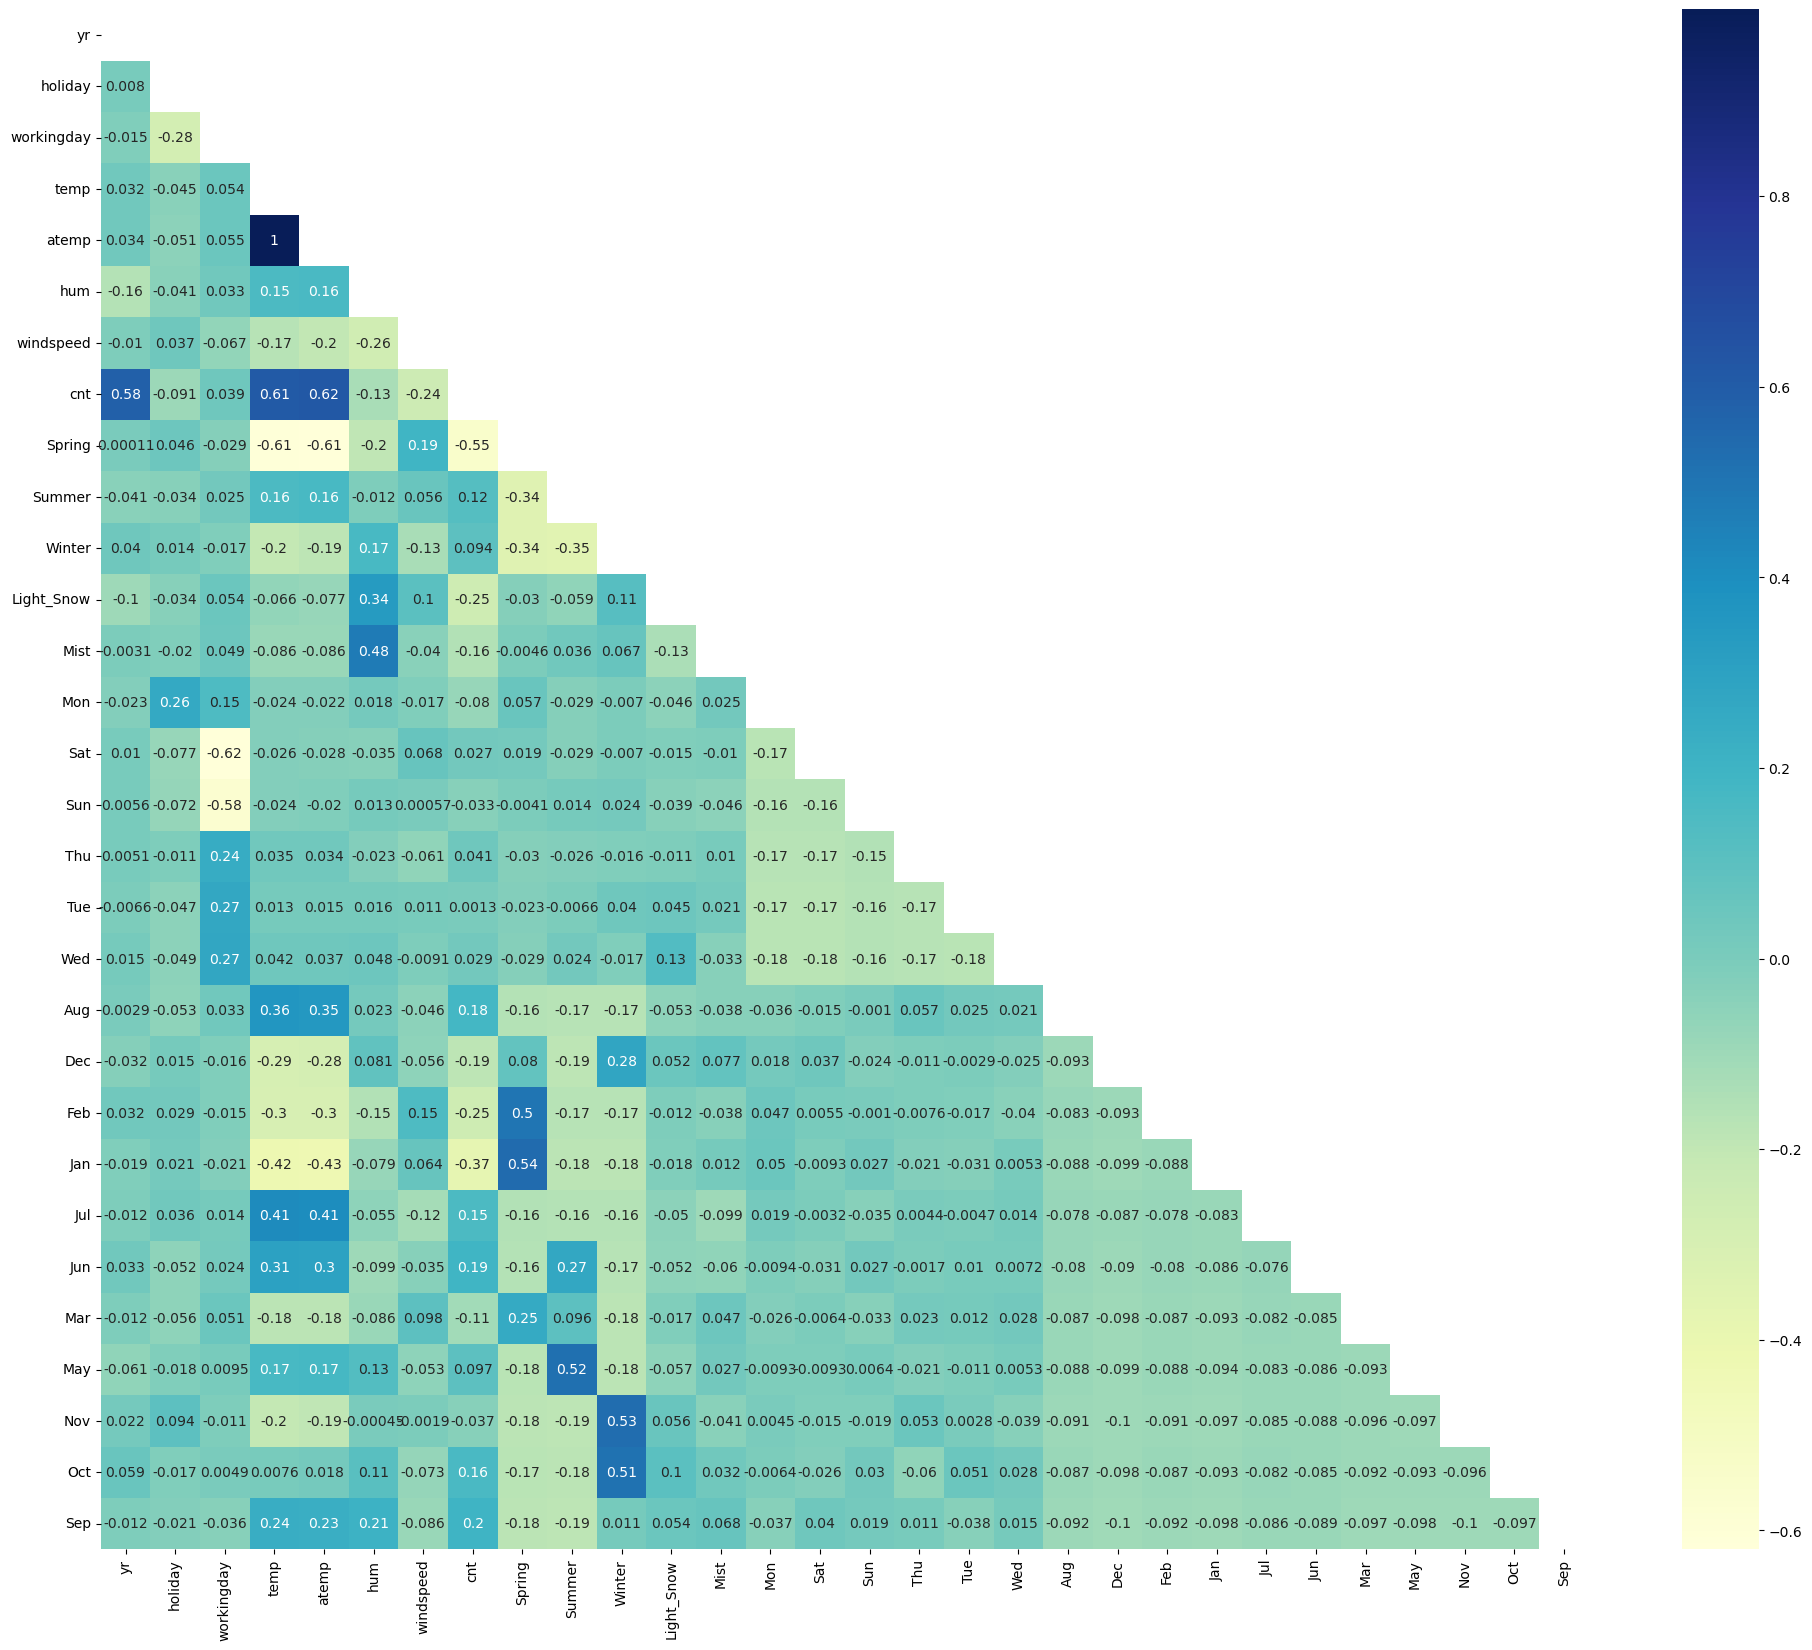

In [132]:
fig, ax = plt.subplots(figsize=(24, 20))

# This creates a matirx with all the values RHS to the diagonal is zero
upper_tri_2 = np.triu(df_train.corr())
                    
sns.heatmap(df_train.corr(), cmap="YlGnBu", annot = True, ax=ax, mask=upper_tri_2)
plt.show()

From above, we can infer that there are around 4 variables which have very good correlation (> +-0.50) with the target variable which are

    1. yr
    2. temp
    3. atemp
    4. spring
    
and There are some which have a considerable correlation (> +-0.25) which are:

    1. Januray
    2. February
    3. windspeed
    4. light_Snow
   

In [133]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [134]:
# Creating linear regression model object
lm = LinearRegression()

# It fits a linear regression Model to the training data
''' This method estimates the coefficients (or weights) of the linear regression model by minimizing the residual sum of squares 
between the predicted values and the actual values on the training data. '''
lm.fit(x_train, y_train)

# It initializes an RFE object with the specified arguments
''' 
Arguments:

-> estimator: This is the model that will be used by the RFE algorithm to select the most important features.
-> n_features_to_select: This is the number of features that will be selected by the RFE algorithm.

'''
rfe = RFE(estimator=lm, n_features_to_select=15)

# It fits the RFE estimator to the training data and selects the optimal number of features
'''
The RFE algorithm is a feature selection method that selects the most important features based on their contribution to the model's performance. It works
by recursively removing less important features and re-fitting the model until the desired number of features is reached.

'''
rfe = rfe.fit(x_train, y_train)

In [135]:
# This create a list of all features/ columns with whether a particular column is selected or not (True & False) and it's ranking where '1' indicates selected variables
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Spring', True, 1),
 ('Summer', False, 12),
 ('Winter', True, 1),
 ('Light_Snow', True, 1),
 ('Mist', False, 2),
 ('Mon', False, 6),
 ('Sat', False, 3),
 ('Sun', False, 8),
 ('Thu', False, 13),
 ('Tue', False, 10),
 ('Wed', False, 14),
 ('Aug', False, 11),
 ('Dec', True, 1),
 ('Feb', True, 1),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 15),
 ('Mar', False, 7),
 ('May', False, 5),
 ('Nov', True, 1),
 ('Oct', False, 9),
 ('Sep', True, 1)]

In [136]:
cols_selected_by_RFE = x_train.columns[rfe.support_]
cols_selected_by_RFE

Index(['yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed', 'Spring',
       'Winter', 'Light_Snow', 'Dec', 'Feb', 'Jan', 'Jul', 'Nov', 'Sep'],
      dtype='object')

## Model Building using Stats Model for Statistics

### 1st Model

In [137]:
# creating x_train with the columns selected by the RFE for stats model
x_train_rfe = x_train[cols_selected_by_RFE]
x_train_rfe.head()

,yr,holiday,temp,atemp,hum,windspeed,Spring,Winter,Light_Snow,Dec,Feb,Jan,Jul,Nov,Sep
72,0,0,0.298094,0.311594,0.393891,0.236118,1,0,0,0,0,0,0,0,0
510,1,0,0.778657,0.731886,0.694105,0.364071,0,0,0,0,0,0,0,0,0
700,1,0,0.327249,0.348399,0.809877,0.210252,0,1,0,1,0,0,0,0,0
264,0,0,0.694699,0.613206,0.910249,0.217975,0,0,0,0,0,0,0,0,1
577,1,0,0.811368,0.765180,0.624004,0.244886,0,0,0,0,0,0,0,0,0


In [138]:
x_train_rfe.shape

(510, 15)

#### Creating Model

In [139]:
''' Don't add constant in the same data variable rather create new as we 'll be needing that for VIF '''

# Adding a constant variable
import statsmodels.api as sm
x_train_rfe_sm = sm.add_constant(x_train_rfe)
x_train_rfe_sm.head()

,const,yr,holiday,temp,atemp,hum,windspeed,Spring,Winter,Light_Snow,Dec,Feb,Jan,Jul,Nov,Sep
72,1.0,0,0,0.298094,0.311594,0.393891,0.236118,1,0,0,0,0,0,0,0,0
510,1.0,1,0,0.778657,0.731886,0.694105,0.364071,0,0,0,0,0,0,0,0,0
700,1.0,1,0,0.327249,0.348399,0.809877,0.210252,0,1,0,1,0,0,0,0,0
264,1.0,0,0,0.694699,0.613206,0.910249,0.217975,0,0,0,0,0,0,0,0,1
577,1.0,1,0,0.811368,0.765180,0.624004,0.244886,0,0,0,0,0,0,0,0,0


In [140]:
# Creating a linear model
lm_1 = sm.OLS(y_train, x_train_rfe_sm, random_state=10).fit()
lm_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     175.5
Date:                Wed, 10 May 2023   Prob (F-statistic):          8.24e-187
Time:                        08:12:19   Log-Likelihood:                 483.32
No. Observations:                 510   AIC:                            -934.6
Df Residuals:                     494   BIC:                            -866.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3608      0.031     11.805      0.000       0.301       0.421
yr             0.2437      0.009     28.165      0.000       0.227       0.261
holiday       -0.0738      0.024     -3.101      0.002      -0.121      -0.027
temp          -0.2315      0.225     -1.027      0.305      -0.674       0.211
atemp          0.7359      0.245      2.999      0.003       0.254       1.218
hum           -0.2606      0.027     -9.530      0.000      -0.314      -0.207
windspeed     -0.1790      0.029     -6.081      0.000      -0.237      -0.121
Spring        -0.0969      0.019     -5.097      0.000      -0.134      -0.060
Winter         0.0848      0.014      5.889      0.000       0.057       0.113
Light_Snow    -0.1379      0.026     -5.290      0.000      -0.189      -0.087
Dec           -0.0714      0.019     -3.853      0.000      -0.108      -0.035
Feb           -0.0505      0.023     -2.235      0.026      -0.095      -0.006
Jan           -0.0699      0.023     -3.071      0.002      -0.115      -0.025
Jul           -0.0687      0.019     -3.560      0.000      -0.107      -0.031
Nov           -0.0756      0.020     -3.875      0.000      -0.114      -0.037
Sep            0.0560      0.016      3.533      0.000       0.025       0.087
==============================================================================
Omnibus:                       76.567   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              168.127
Skew:                          -0.810   Prob(JB):                     3.10e-37
Kurtosis:                       5.299   Cond. No.                         123.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Calculating VIF

Imp: Don't feed data with constant variable. Need to give that data which we had prior to adding constant variable

In [141]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = x_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,atemp,895.00
2,temp,862.74
4,hum,11.49
5,windspeed,4.82
6,Spring,4.49
7,Winter,2.88
11,Jan,2.38
10,Feb,2.15
0,yr,2.08
13,Nov,1.86


By Looking at the p-value & VIF, we should drop 'temp' but this proved to be an important parameter while analysis. Therefore, let's drop 'atemp'

#### Dropping 'atemp' variables with high VIF

In [142]:
x_train_rfe.drop(['atemp'], axis=1, inplace=True)
x_train_rfe.head()

,yr,holiday,temp,hum,windspeed,Spring,Winter,Light_Snow,Dec,Feb,Jan,Jul,Nov,Sep
72,0,0,0.298094,0.393891,0.236118,1,0,0,0,0,0,0,0,0
510,1,0,0.778657,0.694105,0.364071,0,0,0,0,0,0,0,0,0
700,1,0,0.327249,0.809877,0.210252,0,1,0,1,0,0,0,0,0
264,0,0,0.694699,0.910249,0.217975,0,0,0,0,0,0,0,0,1
577,1,0,0.811368,0.624004,0.244886,0,0,0,0,0,0,0,0,0


### 2nd Model

In [143]:
x_train_rfe.shape

(510, 14)

#### Creating Model

In [144]:
''' Don't add constant in the same data variable rather create new variable as we 'll be needing that for VIF '''

# Adding a constant variable
import statsmodels.api as sm
x_train_rfe_sm_2 = sm.add_constant(x_train_rfe)
x_train_rfe_sm_2.head()

,const,yr,holiday,temp,hum,windspeed,Spring,Winter,Light_Snow,Dec,Feb,Jan,Jul,Nov,Sep
72,1.0,0,0,0.298094,0.393891,0.236118,1,0,0,0,0,0,0,0,0
510,1.0,1,0,0.778657,0.694105,0.364071,0,0,0,0,0,0,0,0,0
700,1.0,1,0,0.327249,0.809877,0.210252,0,1,0,1,0,0,0,0,0
264,1.0,0,0,0.694699,0.910249,0.217975,0,0,0,0,0,0,0,0,1
577,1.0,1,0,0.811368,0.624004,0.244886,0,0,0,0,0,0,0,0,0


In [145]:
x_train_rfe_sm_2.shape

(510, 15)

In [146]:
# Creating 2nd Model
lm_2 = sm.OLS(y_train, x_train_rfe_sm_2, random_state=10).fit()
lm_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     184.4
Date:                Wed, 10 May 2023   Prob (F-statistic):          5.03e-186
Time:                        08:14:18   Log-Likelihood:                 478.71
No. Observations:                 510   AIC:                            -927.4
Df Residuals:                     495   BIC:                            -863.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3895      0.029     13.313      0.000       0.332       0.447
yr             0.2443      0.009     28.020      0.000       0.227       0.261
holiday       -0.0789      0.024     -3.297      0.001      -0.126      -0.032
temp           0.4371      0.033     13.108      0.000       0.372       0.503
hum           -0.2545      0.027     -9.259      0.000      -0.309      -0.201
windspeed     -0.2037      0.028     -7.154      0.000      -0.260      -0.148
Spring        -0.0965      0.019     -5.038      0.000      -0.134      -0.059
Winter         0.0883      0.014      6.105      0.000       0.060       0.117
Light_Snow    -0.1484      0.026     -5.699      0.000      -0.200      -0.097
Dec           -0.0714      0.019     -3.826      0.000      -0.108      -0.035
Feb           -0.0521      0.023     -2.285      0.023      -0.097      -0.007
Jan           -0.0751      0.023     -3.286      0.001      -0.120      -0.030
Jul           -0.0699      0.019     -3.597      0.000      -0.108      -0.032
Nov           -0.0753      0.020     -3.828      0.000      -0.114      -0.037
Sep            0.0493      0.016      3.120      0.002       0.018       0.080
==============================================================================
Omnibus:                       74.710   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.649
Skew:                          -0.791   Prob(JB):                     1.77e-36
Kurtosis:                       5.290   Cond. No.                         15.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Calculating VIF

In [147]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = x_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,11.32
3,hum,10.68
4,windspeed,4.73
5,Spring,4.43
6,Winter,2.81
10,Jan,2.38
9,Feb,2.15
0,yr,2.07
12,Nov,1.85
8,Dec,1.73


Since, all the variables have p-value w/n the range and we have decided to keep 'temp'. Therefore, let's remove 'hum' variable which have VIF value > 5

#### Dropping 'hum' variable with high VIF

In [148]:
x_train_rfe.drop(['hum'], axis=1, inplace=True)
x_train_rfe.head()

,yr,holiday,temp,windspeed,Spring,Winter,Light_Snow,Dec,Feb,Jan,Jul,Nov,Sep
72,0,0,0.298094,0.236118,1,0,0,0,0,0,0,0,0
510,1,0,0.778657,0.364071,0,0,0,0,0,0,0,0,0
700,1,0,0.327249,0.210252,0,1,0,1,0,0,0,0,0
264,0,0,0.694699,0.217975,0,0,0,0,0,0,0,0,1
577,1,0,0.811368,0.244886,0,0,0,0,0,0,0,0,0


### 3rd Model

In [149]:
x_train_rfe.shape

(510, 13)

#### Creating Model

In [150]:
''' Don't add constant in the same data variable rather create new variable as we 'll be needing that for VIF '''

# Adding a constant variable
import statsmodels.api as sm
x_train_rfe_sm_3 = sm.add_constant(x_train_rfe)
x_train_rfe_sm_3.head()

,const,yr,holiday,temp,windspeed,Spring,Winter,Light_Snow,Dec,Feb,Jan,Jul,Nov,Sep
72,1.0,0,0,0.298094,0.236118,1,0,0,0,0,0,0,0,0
510,1.0,1,0,0.778657,0.364071,0,0,0,0,0,0,0,0,0
700,1.0,1,0,0.327249,0.210252,0,1,0,1,0,0,0,0,0
264,1.0,0,0,0.694699,0.217975,0,0,0,0,0,0,0,0,1
577,1.0,1,0,0.811368,0.244886,0,0,0,0,0,0,0,0,0


In [151]:
x_train_rfe_sm_3.shape

(510, 14)

In [152]:
# Creating Model
lm_3 = sm.OLS(y_train, x_train_rfe_sm_3, random_state=10).fit()
lm_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     164.0
Date:                Wed, 10 May 2023   Prob (F-statistic):          4.63e-170
Time:                        08:15:35   Log-Likelihood:                 437.99
No. Observations:                 510   AIC:                            -848.0
Df Residuals:                     496   BIC:                            -788.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2481      0.027      9.189      0.000       0.195       0.301
yr             0.2573      0.009     27.641      0.000       0.239       0.276
holiday       -0.0777      0.026     -2.998      0.003      -0.129      -0.027
temp           0.3899      0.036     10.932      0.000       0.320       0.460
windspeed     -0.1330      0.030     -4.480      0.000      -0.191      -0.075
Spring        -0.0982      0.021     -4.739      0.000      -0.139      -0.057
Winter         0.0744      0.016      4.776      0.000       0.044       0.105
Light_Snow    -0.2361      0.026     -8.995      0.000      -0.288      -0.184
Dec           -0.0842      0.020     -4.178      0.000      -0.124      -0.045
Feb           -0.0501      0.025     -2.033      0.043      -0.099      -0.002
Jan           -0.0852      0.025     -3.448      0.001      -0.134      -0.037
Jul           -0.0474      0.021     -2.271      0.024      -0.088      -0.006
Nov           -0.0719      0.021     -3.378      0.001      -0.114      -0.030
Sep            0.0308      0.017      1.814      0.070      -0.003       0.064
==============================================================================
Omnibus:                       93.181   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              226.717
Skew:                          -0.932   Prob(JB):                     5.88e-50
Kurtosis:                       5.682   Cond. No.                         14.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Calculating VIF

In [153]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = x_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.82
3,windspeed,4.73
4,Spring,4.18
5,Winter,2.56
9,Jan,2.29
8,Feb,2.14
0,yr,2.05
11,Nov,1.83
7,Dec,1.64
10,Jul,1.36


Let's drop 'Sep' because of the high p-value

#### Dropping Variable with high P-value

In [154]:
x_train_rfe.drop(['Sep'], axis=1, inplace=True)
x_train_rfe.head()

,yr,holiday,temp,windspeed,Spring,Winter,Light_Snow,Dec,Feb,Jan,Jul,Nov
72,0,0,0.298094,0.236118,1,0,0,0,0,0,0,0
510,1,0,0.778657,0.364071,0,0,0,0,0,0,0,0
700,1,0,0.327249,0.210252,0,1,0,1,0,0,0,0
264,0,0,0.694699,0.217975,0,0,0,0,0,0,0,0
577,1,0,0.811368,0.244886,0,0,0,0,0,0,0,0


In [155]:
x_train_rfe.shape

(510, 12)

### 4th Model

#### Creating Model

In [156]:
''' Don't add constant in the same data variable rather create new variable as we 'll be needing that for VIF '''

# Adding a constant variable
import statsmodels.api as sm
x_train_rfe_sm_4 = sm.add_constant(x_train_rfe)
x_train_rfe_sm_4.head()

,const,yr,holiday,temp,windspeed,Spring,Winter,Light_Snow,Dec,Feb,Jan,Jul,Nov
72,1.0,0,0,0.298094,0.236118,1,0,0,0,0,0,0,0
510,1.0,1,0,0.778657,0.364071,0,0,0,0,0,0,0,0
700,1.0,1,0,0.327249,0.210252,0,1,0,1,0,0,0,0
264,1.0,0,0,0.694699,0.217975,0,0,0,0,0,0,0,0
577,1.0,1,0,0.811368,0.244886,0,0,0,0,0,0,0,0


In [203]:
x_train_rfe_sm_4.shape

(510, 13)

In [157]:
# Creating Model
lm_4 = sm.OLS(y_train, x_train_rfe_sm_4, random_state=10).fit()
lm_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     176.6
Date:                Wed, 10 May 2023   Prob (F-statistic):          1.74e-170
Time:                        08:20:53   Log-Likelihood:                 436.30
No. Observations:                 510   AIC:                            -846.6
Df Residuals:                     497   BIC:                            -791.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2469      0.027      9.126      0.000       0.194       0.300
yr             0.2569      0.009     27.543      0.000       0.239       0.275
holiday       -0.0769      0.026     -2.960      0.003      -0.128      -0.026
temp           0.4009      0.035     11.386      0.000       0.332       0.470
windspeed     -0.1361      0.030     -4.581      0.000      -0.194      -0.078
Spring        -0.0983      0.021     -4.733      0.000      -0.139      -0.058
Winter         0.0768      0.016      4.940      0.000       0.046       0.107
Light_Snow    -0.2328      0.026     -8.871      0.000      -0.284      -0.181
Dec           -0.0870      0.020     -4.318      0.000      -0.127      -0.047
Feb           -0.0504      0.025     -2.040      0.042      -0.099      -0.002
Jan           -0.0848      0.025     -3.425      0.001      -0.133      -0.036
Jul           -0.0548      0.021     -2.673      0.008      -0.095      -0.015
Nov           -0.0762      0.021     -3.594      0.000      -0.118      -0.035
==============================================================================
Omnibus:                       88.999   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              220.895
Skew:                          -0.886   Prob(JB):                     1.08e-48
Kurtosis:                       5.694   Cond. No.                         14.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Calculating VIF

In [158]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = x_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,windspeed,4.71
2,temp,4.39
4,Spring,4.18
5,Winter,2.55
9,Jan,2.29
8,Feb,2.14
0,yr,2.05
11,Nov,1.81
7,Dec,1.62
10,Jul,1.31


#### Dropping variable with high p-value

In [181]:
x_train_rfe.drop(['Feb'], axis=1, inplace=True)
x_train_rfe.head()

,yr,holiday,temp,windspeed,Spring,Winter,Light_Snow,Dec,Jan,Jul,Nov
72,0,0,0.298094,0.236118,1,0,0,0,0,0,0
510,1,0,0.778657,0.364071,0,0,0,0,0,0,0
700,1,0,0.327249,0.210252,0,1,0,1,0,0,0
264,0,0,0.694699,0.217975,0,0,0,0,0,0,0
577,1,0,0.811368,0.244886,0,0,0,0,0,0,0


In [182]:
x_train_rfe.shape

(510, 11)

### 5th Model

#### Creating Model

In [183]:
''' Don't add constant in the same data variable rather create new variable as we 'll be needing that for VIF '''

# Adding a constant variable
import statsmodels.api as sm
x_train_rfe_sm_5 = sm.add_constant(x_train_rfe)
x_train_rfe_sm_5.head()

,const,yr,holiday,temp,windspeed,Spring,Winter,Light_Snow,Dec,Jan,Jul,Nov
72,1.0,0,0,0.298094,0.236118,1,0,0,0,0,0,0
510,1.0,1,0,0.778657,0.364071,0,0,0,0,0,0,0
700,1.0,1,0,0.327249,0.210252,0,1,0,1,0,0,0
264,1.0,0,0,0.694699,0.217975,0,0,0,0,0,0,0
577,1.0,1,0,0.811368,0.244886,0,0,0,0,0,0,0


In [184]:
# Creating Model
lm_5 = sm.OLS(y_train, x_train_rfe_sm_5, random_state=10).fit()
lm_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     191.0
Date:                Wed, 10 May 2023   Prob (F-statistic):          9.70e-171
Time:                        08:56:07   Log-Likelihood:                 434.17
No. Observations:                 510   AIC:                            -844.3
Df Residuals:                     498   BIC:                            -793.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2383      0.027      8.889      0.000       0.186       0.291
yr             0.2564      0.009     27.411      0.000       0.238       0.275
holiday       -0.0778      0.026     -2.987      0.003      -0.129      -0.027
temp           0.4148      0.035     11.969      0.000       0.347       0.483
windspeed     -0.1366      0.030     -4.584      0.000      -0.195      -0.078
Spring        -0.1204      0.018     -6.768      0.000      -0.155      -0.085
Winter         0.0742      0.016      4.773      0.000       0.044       0.105
Light_Snow    -0.2329      0.026     -8.848      0.000      -0.285      -0.181
Dec           -0.0726      0.019     -3.836      0.000      -0.110      -0.035
Jan           -0.0564      0.021     -2.745      0.006      -0.097      -0.016
Jul           -0.0578      0.021     -2.818      0.005      -0.098      -0.018
Nov           -0.0695      0.021     -3.307      0.001      -0.111      -0.028
==============================================================================
Omnibus:                       80.780   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              193.386
Skew:                          -0.820   Prob(JB):                     1.02e-42
Kurtosis:                       5.532   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Calculating VIF

In [185]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = x_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,windspeed,4.67
2,temp,4.33
5,Winter,2.49
4,Spring,2.43
0,yr,2.05
10,Nov,1.78
8,Jan,1.60
7,Dec,1.46
9,Jul,1.31
6,Light_Snow,1.08


# Model Interpretation

## Equation of best fitted surface

In [206]:
round(lm_5.params,2)

const         0.24
yr            0.26
holiday      -0.08
temp          0.41
windspeed    -0.14
Spring       -0.12
Winter        0.07
Light_Snow   -0.23
Dec          -0.07
Jan          -0.06
Jul          -0.06
Nov          -0.07
dtype: float64

 cnt = 0.24 + (year * 0.26) - (holiday * 0.08) + (temp * 0.41) - (windspeed * 0.14) - (Spring * 0.12) + (Winter * 0.07) - (Light_Snow * 0.23) - (Dec * 0.07) - (Jan * 0.06) - (Jul * 0.06) - (Nov * 0.07)

## Coefficient Interpretation

* These coefficent can be divided into two groups:
    * Positively impact cnt: const, yr, temp, Winter
    * Negatively impact cnt: holiday, windspeed, Spring, Light_Snow, Dec, Jan, Jul & Nov
    
* Positve coefficent 'll increase the 'cnt' (no. of bike bookings) whereas Negative coefficient 'll decrease the 'cnt'

* For a unit increase in each parameter, their impact can be analysed by multiplying with their respective coefficent. Let's understand this with a few parameters:
    * yr        : For a unit increase in year, the cnt 'll increase by 1 * 0.26 i.e. 0.26 units
    * temp      : For a unit increase in temp, the cnt 'll increase by 1 * 0.41 i.e. 0.41 units
    * Windspeed : For a unit increase in windspeed, the cnt 'll decrease by 1 * 0.14 i.e. 0.14 units

## F-statistics

* F-statistic       :	191.0
* Prob (F-statistic):	9.70e-171
* F-statistic signifies the overall fit of the model. Higher it is, better is our model.
* Since, p-value of all the coefficients are < 0.00 & the value of F-statistic is also quite descent. Therefore, we can say that the overall fit of the model is good.

# Model Assumptions Verification

To analyse whether this model satisfies all the assumptions of MLR

## Linear Relationship b/w X & Y

<Figure size 1200x800 with 0 Axes>

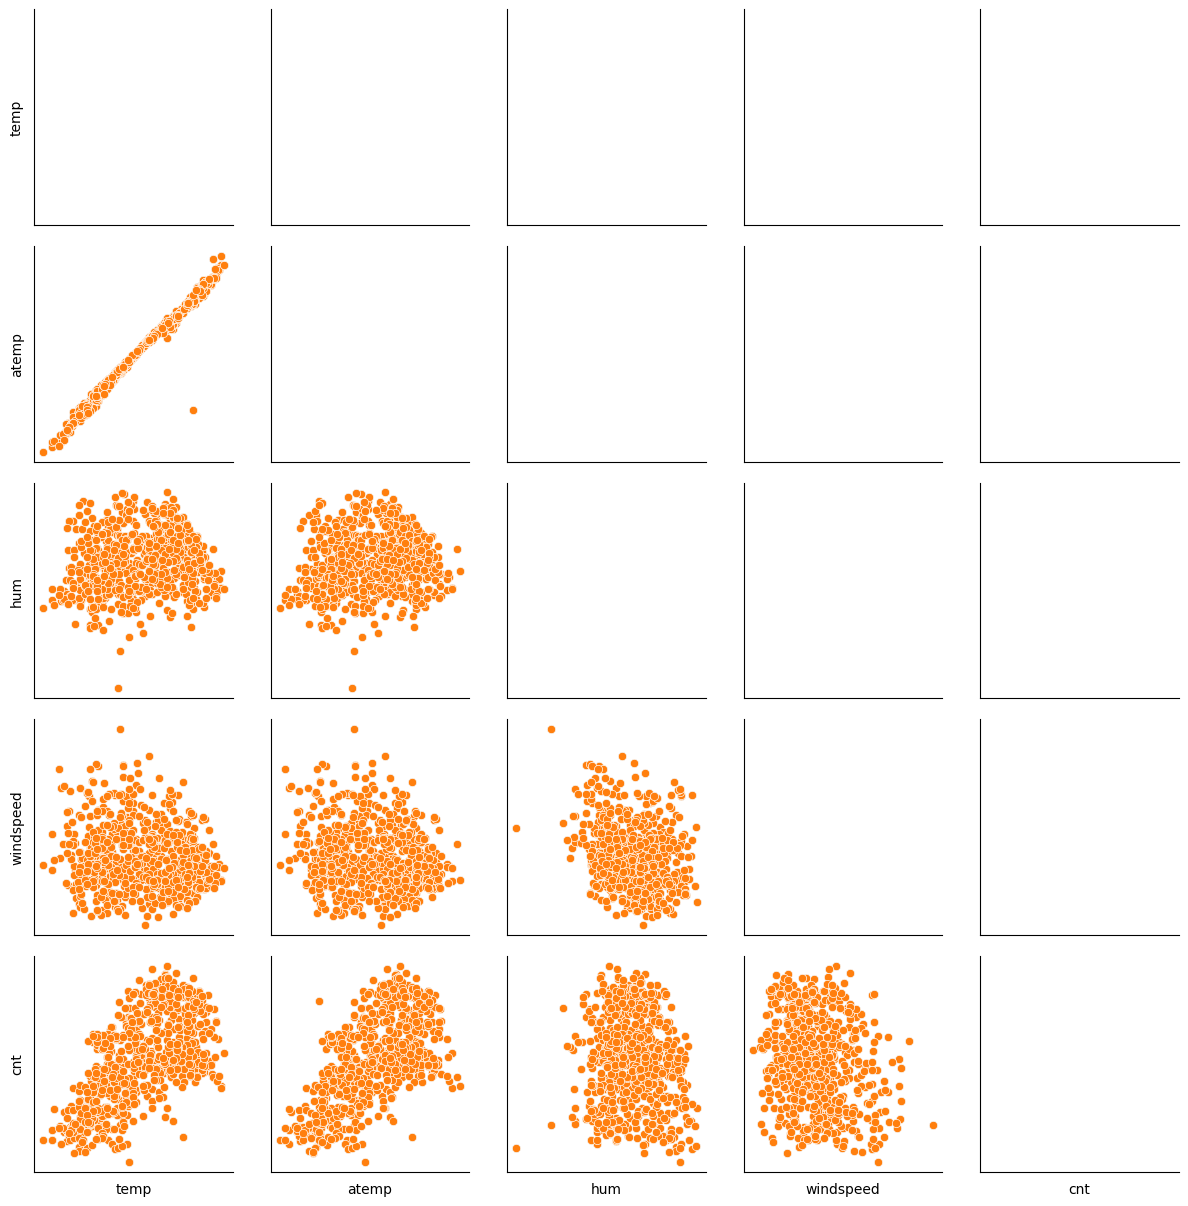

In [187]:
# Heatmap to understand colinearity b/w variables
plt.figure(figsize=(12,8))

numeric_variables = ['temp', 'atemp','hum','windspeed', 'cnt']
numeric_variables_df = original_data[numeric_variables]

# create a pair plot
pair_plot = sns.PairGrid(numeric_variables_df)
pair_plot.map_lower(sns.scatterplot)

# show only the upper triangle
pair_plot = pair_plot.map_lower(sns.scatterplot).set(xticks=[], yticks=[])

sns.despine()
plt.show()

We can observe that 'cnt' has linear relationship with rest of the variables.

## Error Terms Normally Distributed

In [188]:
# Predicting 'y-value' of training data (with constant)
y_train_pred = lm_5.predict(x_train_rfe_sm_5)
y_train_pred.shape

(510,)

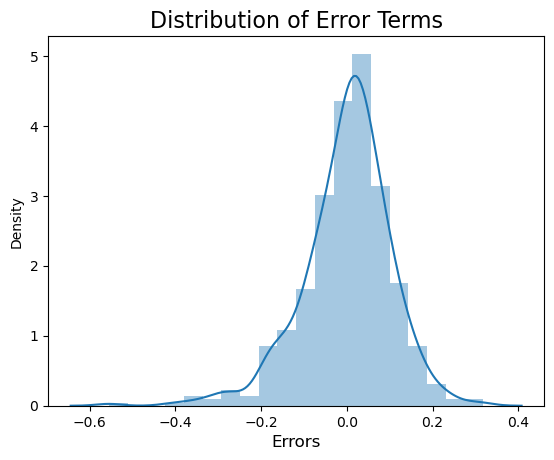

In [189]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
plt.title('Distribution of Error Terms', fontsize = 16)            
plt.xlabel('Errors', fontsize = 12)                         
plt.show()

This indicates that error terms are normally distributed. Therefore, our model is correct and 'll make good predictions.

## Error Terms Independent of Each Other

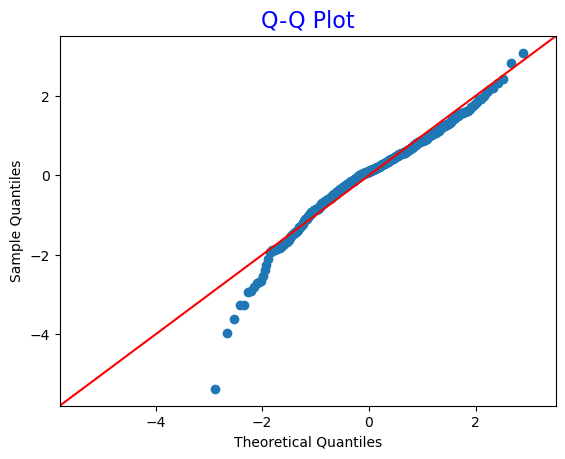

In [195]:
# Make q-q plot

import scipy.stats as stats

error = y_train - y_train_pred
sm.qqplot(error,line='45',fit=True,dist=stats.norm)
plt.title('Q-Q Plot', color='b', fontsize=16)
plt.show()

This indicates that error terms are independent of each other

## Homoscedasticity i.e. Error Terms has Constant variance

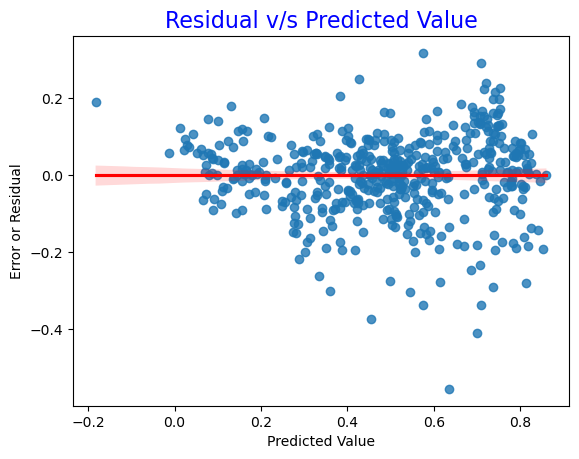

In [191]:
error = y_train - y_train_pred
sns.regplot(x=y_train_pred, y=error, line_kws={'color': 'red'})
plt.xlabel('Predicted Value')
plt.ylabel('Error or Residual')
plt.title('Residual v/s Predicted Value', color='b', fontsize=16)
plt.show()

This indicates that error terms have constant variance

## Multi-collinearity

In [192]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = x_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,windspeed,4.67
2,temp,4.33
5,Winter,2.49
4,Spring,2.43
0,yr,2.05
10,Nov,1.78
8,Jan,1.60
7,Dec,1.46
9,Jul,1.31
6,Light_Snow,1.08


SInce, all the VIF values are below 5, therefore, we can confidently say that there is no multi-collinearity.

In [ ]:
Need to check solution for further steps and add them to your word file

# Making Predictions

In [196]:
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
566,1,0,0,24.429153,27.49560,86.5417,14.291100,4459,0,0,...,0,0,0,1,0,0,0,0,0,0
374,1,0,1,12.656536,15.94130,64.6522,12.565984,3598,1,0,...,0,0,1,0,0,0,0,0,0,0
181,0,0,1,29.622500,32.60810,39.6250,6.874736,5362,0,0,...,0,0,0,1,0,0,0,0,0,0
529,1,0,1,26.581653,31.21915,56.9583,17.000111,7363,0,1,...,0,0,0,0,1,0,0,0,0,0
233,0,0,1,28.358347,31.91270,47.0000,18.542250,4758,0,0,...,0,0,0,0,0,0,0,0,0,0


In [197]:
df_test.shape

(220, 30)

## Applying scaling on test data

We are using 'transform' & not 'fit_transform' because we don't want our model to learn anything from the test data rather just use the learned parameters from the training data and apply that on test data for feature scaling

In [198]:
features_to_scale = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
df_test[features_to_scale] = scaler.transform(df_test[features_to_scale])
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
566,1,0,0,0.652175,0.606373,0.863516,0.393568,0.486297,0,0,...,0,0,0,1,0,0,0,0,0,0
374,1,0,1,0.276477,0.293773,0.584521,0.340487,0.382349,1,0,...,0,0,1,0,0,0,0,0,0,0
181,0,0,1,0.817910,0.744691,0.265533,0.165370,0.595316,0,0,...,0,0,0,1,0,0,0,0,0,0
529,1,0,1,0.720868,0.707113,0.486457,0.476922,0.836895,0,1,...,0,0,0,0,1,0,0,0,0,0
233,0,0,1,0.777567,0.725877,0.359532,0.524373,0.522395,0,0,...,0,0,0,0,0,0,0,0,0,0


## Creating required Test data

## Creating X & Y

In [199]:
x_test = df_test.drop('cnt', axis=1)
y_test = df_test['cnt']

In [200]:
print(x_test.head())
print(x_test.shape)

     yr  holiday  workingday      temp     atemp       hum  windspeed  Spring  \
566   1        0           0  0.652175  0.606373  0.863516   0.393568       0   
374   1        0           1  0.276477  0.293773  0.584521   0.340487       1   
181   0        0           1  0.817910  0.744691  0.265533   0.165370       0   
529   1        0           1  0.720868  0.707113  0.486457   0.476922       0   
233   0        0           1  0.777567  0.725877  0.359532   0.524373       0   

     Summer  Winter  ...  Dec  Feb  Jan  Jul  Jun  Mar  May  Nov  Oct  Sep  
566       0       0  ...    0    0    0    1    0    0    0    0    0    0  
374       0       0  ...    0    0    1    0    0    0    0    0    0    0  
181       0       0  ...    0    0    0    1    0    0    0    0    0    0  
529       1       0  ...    0    0    0    0    1    0    0    0    0    0  
233       0       0  ...    0    0    0    0    0    0    0    0    0    0  

[5 rows x 29 columns]
(220, 29)


In [201]:
print(y_test.head())
print(y_test.shape)

566    0.486297
374    0.382349
181    0.595316
529    0.836895
233    0.522395
Name: cnt, dtype: float64
(220,)


## Creating required 'x_test' Data

In [202]:
# Making test data using columns choosen by the final model
x_test = x_test[x_train_rfe.columns]
x_test.head()

,yr,holiday,temp,windspeed,Spring,Winter,Light_Snow,Dec,Jan,Jul,Nov
566,1,0,0.652175,0.393568,0,0,1,0,0,1,0
374,1,0,0.276477,0.340487,1,0,0,0,1,0,0
181,0,0,0.817910,0.165370,0,0,0,0,0,1,0
529,1,0,0.720868,0.476922,0,0,0,0,0,0,0
233,0,0,0.777567,0.524373,0,0,0,0,0,0,0


In [203]:
x_test.shape

(220, 11)

## Predictions

In [204]:
x_test_sm = sm.add_constant(x_test)
y_test_pred = lm_5.predict(x_test_sm)
y_test_pred.shape

(220,)

# Model Evaluation

## R² & Adjusted R²

In [207]:
# R²
from sklearn.metrics import r2_score
r2_score(y_true=y_test, y_pred=y_test_pred)

0.7978551651289258

In [214]:
# Adjusted R²

'''
Adjusted R² = 1 - (1 - R²)(N - 1)
                  ---------------
                  N - p - 1
                  
Where, 
    N: No. of rows
    p: No. of predictor variable
'''
N = x_test.shape[0]
p = x_test.shape[1]
r_2 = 0.7978

adjusted_r_square = 1 - ((1-r_2)*(N-1))/(N-p-1)
print(adjusted_r_square)

0.7871067307692308


## y_test v/s y_pred

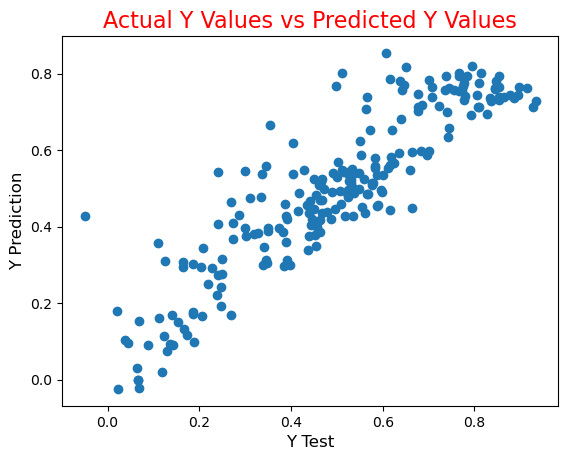

In [215]:
#fig = plt.figure()
plt.scatter(y_test, y_test_pred)
plt.title('Actual Y Values vs Predicted Y Values', fontsize = 16, color='r')               
plt.xlabel('Y Test', fontsize = 12)                   
plt.ylabel('Y Prediction', fontsize = 12)
plt.show()

From the above plot, we can infer that it is showing a linear relationship, therefore, we can say that we have a good model.

## Regression plot

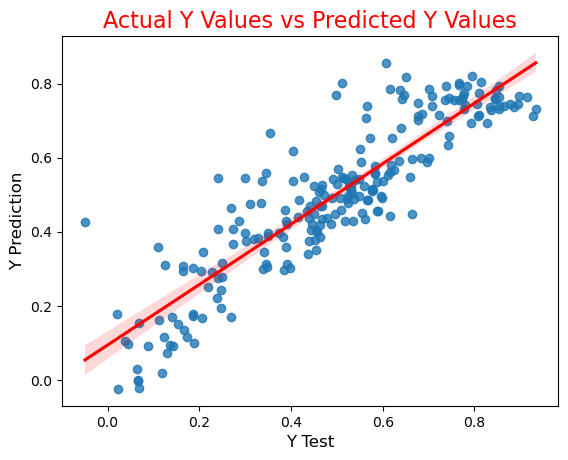

In [222]:
plt.figure()
sns.regplot(x=y_test, y=y_test_pred, fit_reg=True, line_kws={'color':'r'})
plt.title('Actual Y Values vs Predicted Y Values', fontsize = 16, color='r')               
plt.xlabel('Y Test', fontsize = 12)                   
plt.ylabel('Y Prediction', fontsize = 12)
plt.show()

## Comparision of R² & Adjusted R² values of Train & Test data

                      R²    Adjusted R²
    Training Data  0.808     0.804
    Test Data      0.797      0.787

Since, R² & Adjusted R² values of both Train & Test data is almost same. Therefore, we can conclude that we have a good model and it 'll make good predictions

# Conclusion

* The company should focus on these top three parameters which positively impacts our target variable 'cnt' 
    * yr
    * temp
    * winter
* The company should also focus on these top three parameters which negatively impacts our target variable 'cnt'
    * Light_Snow
    * Windspeed
    * Spring 